# ***Bank Customer Churn Model Project***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('/content/Bank Churn Modelling.csv')

In [3]:
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
Num Of Products,0
Has Credit Card,0


In [7]:
df.shape

(10000, 13)

In [8]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
Num Of Products,int64
Has Credit Card,int64


In [10]:
df = df.set_index('CustomerId')

# Exploratory Data Analysis (EDA)

In [11]:
# 1. Summary Statistics
print("Summary Statistics for Numerical Columns:")
print(df.describe())

Summary Statistics for Numerical Columns:
        CreditScore           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  \
count     10000.000000      10000.00000      10000.000000      10000.000000   
mean          1.530200          0.70550          0.515100     100090.239881   
std           0.581654          0.45584          0.499797      57510.492818   
min           1.000000          0.00000        

In [12]:
# 2. Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n{df[col].value_counts()}")


Unique Values in Categorical Columns:

Surname:
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


# Data Visualization

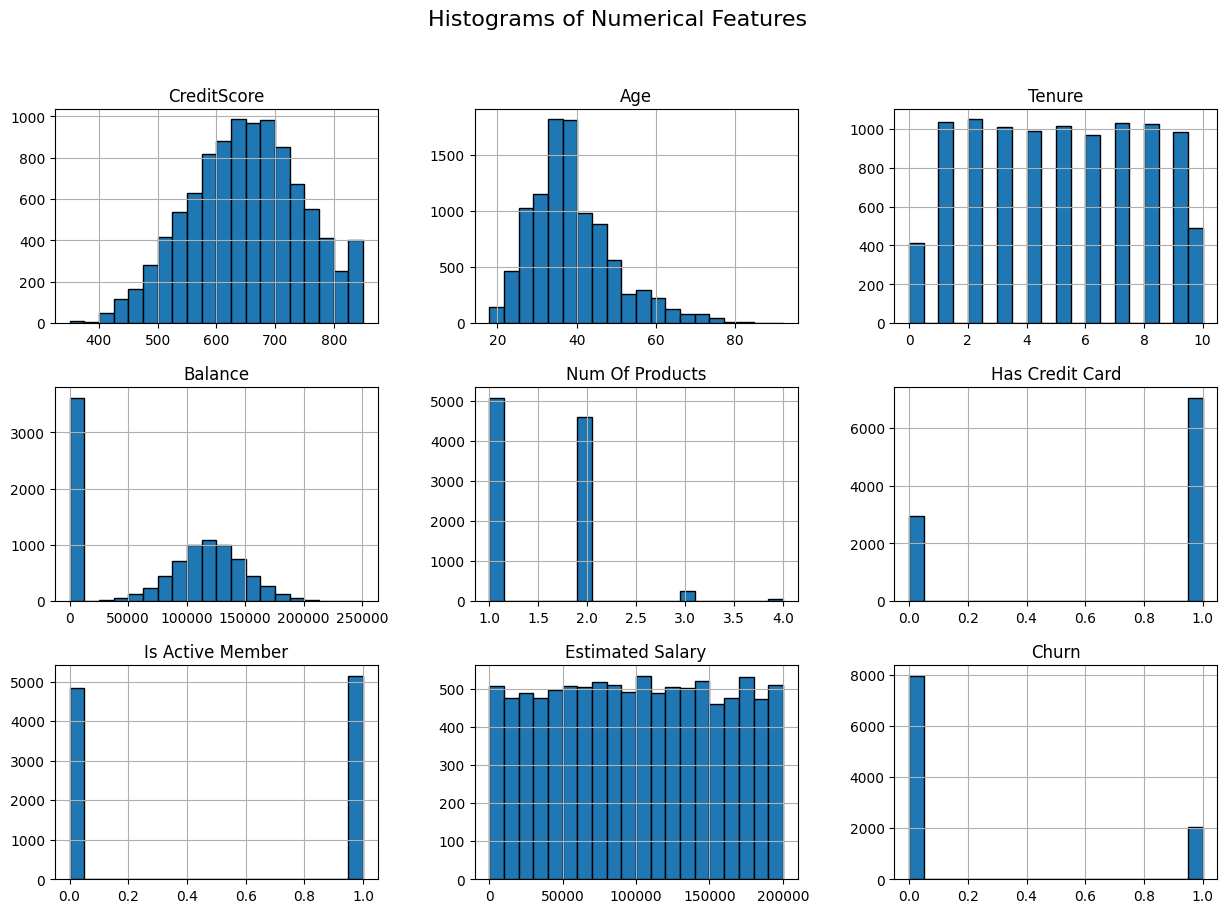

In [13]:
# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

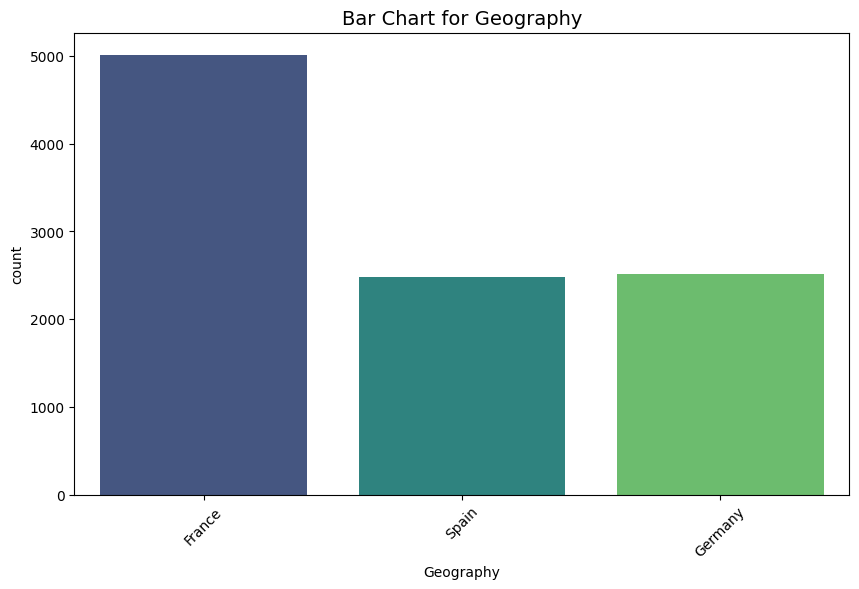

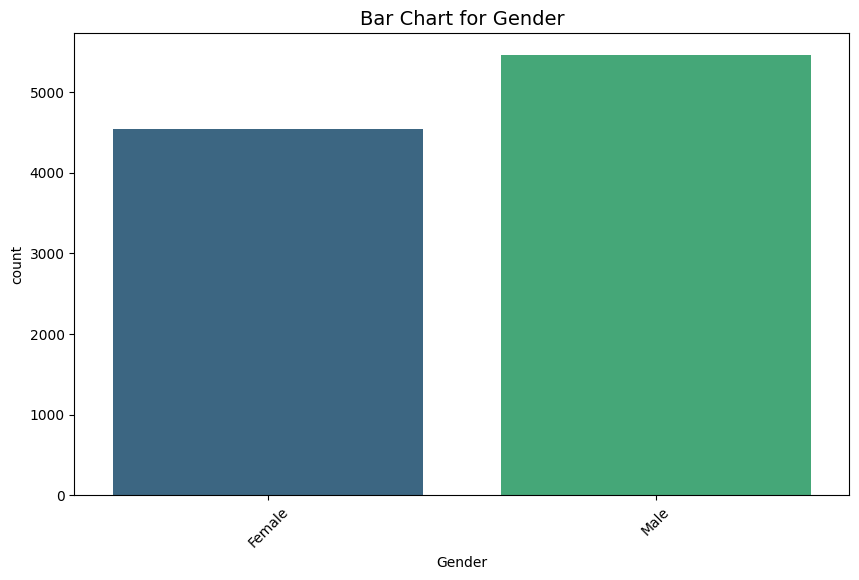

In [14]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns, excluding 'surname'
for col in categorical_cols:
    if col.lower() != 'surname':  # Exclude 'surname' column
        plt.figure(figsize=(10, 6))
        # Use hue as the same column to get different colors without the warning
        sns.countplot(x=col, data=df, hue=col, dodge=False, palette="viridis", legend=False)
        plt.title(f'Bar Chart for {col}', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

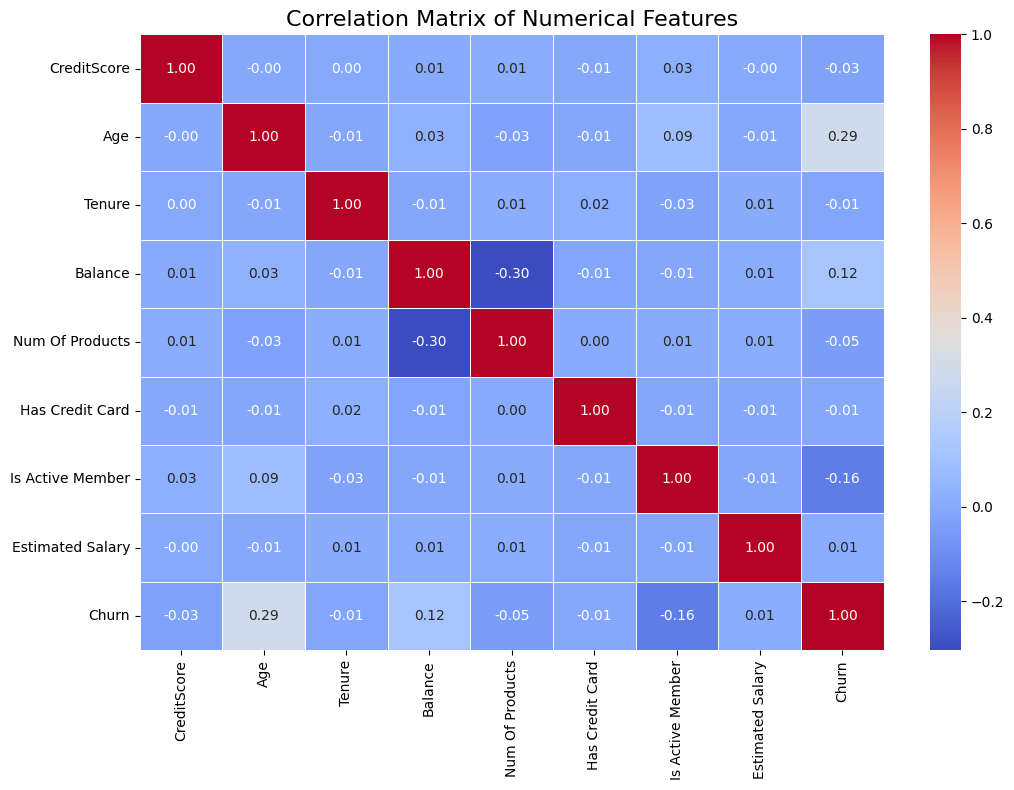

In [15]:
# Filter the DataFrame to include only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# ***Encoding***

In [16]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [17]:
df.replace({"Geography" : {'France':0,'Spain':1,'Germany':2}},inplace=True)

In [18]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [19]:
df.replace({"Gender" : {'Female':0,'Male':1}},inplace=True)

In [20]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [21]:
df.replace({"Num Of Products" : {1:0,2:1,3:1,4:1}},inplace=True)

In [22]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [23]:
df["Is Active Member"].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [24]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [25]:
df['Zero Balance'] = np.where(df['Balance'] == 0, 1, 0)

<Axes: >

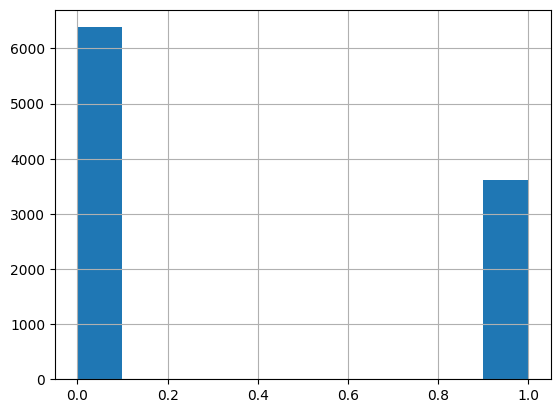

In [26]:
df['Zero Balance'].hist()

In [27]:
df.groupby(['Churn' , 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             2064         2064    2064  2064    2064     2064   
      2             1695         1695    1695  1695    1695     1695   
1     0              810          810     810   810     810      810   
      1              413          413     413   413     413      413   
      2              814          814     814   814     814      814   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     2064             2064              2064   
      2                     1695             1695              1695   
1     0                      810              810               810   
      1                      413              413               413   
      2                      814              814               814   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      2064          2064  
      2                      1695          1695  
1     0                       810           810  
      1                       413           413  
      2                       814           814

# ***Define Label and Features***

In [28]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [29]:
x = df.drop(['Surname' , 'Churn'], axis=1)
y = df['Churn']

In [30]:
x.shape , y.shape

((10000, 11), (10000,))

# ***handle imblance data***

In [31]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

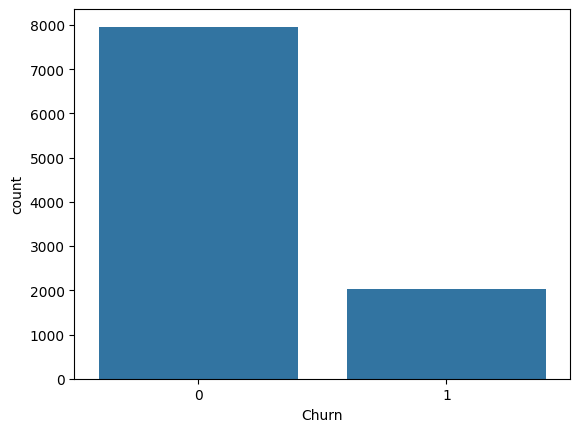

In [32]:
sns.countplot(x='Churn', data=df)

In [33]:
x.shape , y.shape

((10000, 11), (10000,))

# ***Random Under Sampling***

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
rus = RandomUnderSampler(random_state=2529)
x_rus, y_rus = rus.fit_resample(x, y)

In [36]:
x_rus.shape , y_rus.shape,x.shape , y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [37]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [38]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

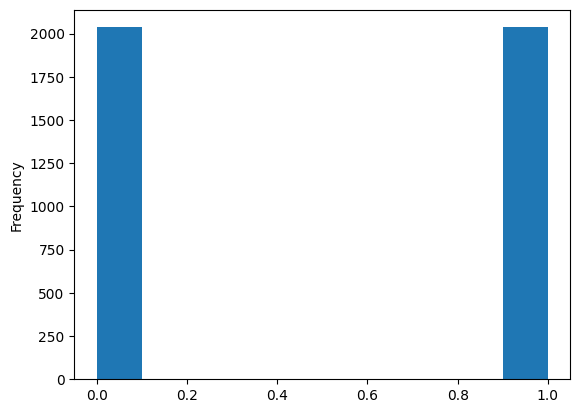

In [39]:
y_rus.plot(kind='hist')

# Random Over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros = RandomOverSampler(random_state=2529)
x_ros, y_ros = ros.fit_resample(x, y)

In [42]:
x_ros.shape , y_ros.shape,x.shape , y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [43]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [44]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

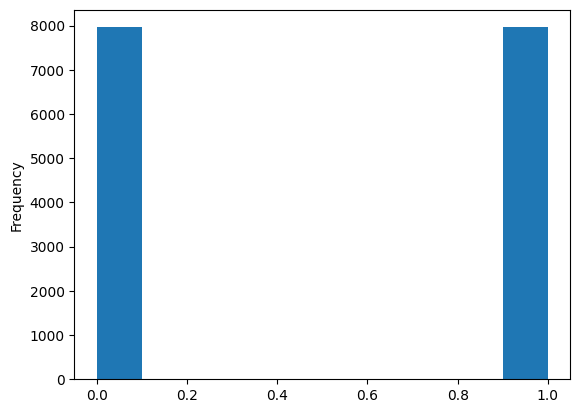

In [45]:
y_ros.plot(kind='hist')

# ***Train Test Split***

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size= 0.3 ,random_state= 25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

# Split Random under Sample Data

In [47]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=2529)
x_train_rus.shape, x_test_rus.shape, y_train_rus.shape, y_test_rus.shape

((2851, 11), (1223, 11), (2851,), (1223,))

# Split Random over Sample Data

In [48]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=2529)
x_train_ros.shape, x_test_ros.shape, y_train_ros.shape, y_test_ros.shape

((11148, 11), (4778, 11), (11148,), (4778,))

# Standardize Features

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standardize original data

In [50]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random under Sample Data

In [51]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random over Sample Data

In [52]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Support Vector Machine Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC()

In [55]:
svc.fit(x_train, y_train)

SVC()

In [56]:
y_pred= svc.predict(x_test)

# Model Accuracy

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
confusion_matrix(y_test, y_pred)

array([[2372,   47],
       [ 411,  170]])

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.29      0.43       581

    accuracy                           0.85      3000
   macro avg       0.82      0.64      0.67      3000
weighted avg       0.84      0.85      0.82      3000



# hyperparameter tunning

In [60]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced', None]}

In [67]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)  # verbose=2 for more detailed output
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid_search.best_estimator_)

SVC(C=10, gamma=0.1)


In [69]:
grid_predictions = grid_search.predict(x_test)

In [70]:
confusion_matrix(y_test, grid_predictions)

array([[2345,   74],
       [ 372,  209]])

In [71]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2419
           1       0.74      0.36      0.48       581

    accuracy                           0.85      3000
   macro avg       0.80      0.66      0.70      3000
weighted avg       0.84      0.85      0.83      3000



# Modal With Random Under Sampling

In [72]:
svc_rus = SVC()

In [73]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [74]:
y_pred_rus = svc_rus.predict(x_test_rus)

# Modal Accuracy

In [75]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[473, 154],
       [163, 433]])

In [76]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       627
           1       0.74      0.73      0.73       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# hyperparameter tunning

In [77]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced', None]}

In [78]:
grid_search_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)  # verbose=2 for more detailed output
grid_search_rus.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [79]:
print(grid_search_rus.best_estimator_)

SVC(C=1, gamma=0.1)


In [80]:
grid_predictions_rus = grid_search_rus.predict(x_test_rus)

In [81]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[472, 155],
       [159, 437]])

In [82]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       627
           1       0.74      0.73      0.74       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# Modal With Random over Sampling

In [83]:
svc_ros = SVC()

In [84]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [85]:
y_pred_ros = svc_ros.predict(x_test_ros)

# Model Accuracy

In [86]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1815,  564],
       [ 588, 1811]])

In [87]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2379
           1       0.76      0.75      0.76      2399

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



# Hyperparameter Tunning

In [88]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced', None]}

In [89]:
grid_search_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)  # verbose=2 for more detailed output
grid_search_ros.fit(x_train_ros, y_train_ros)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid_search_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [91]:
grid_predictions_ros = grid_search_ros.predict(x_test_ros)

In [92]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2029,  350],
       [  70, 2329]])

In [93]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2379
           1       0.87      0.97      0.92      2399

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778

